In [6]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#path = '/content/gdrive/My Drive/Colab Notebooks/707/Labs/'
#import sys
#sys.path.append(path)

In [7]:
# !pip install torch
# !pip install -U "ray[rllib]" torch

## Use DQN and train your algorithm on the Dungeon environment.

You can take inspiration from:
https://docs.ray.io/en/latest/rllib/rllib-training.html#basic-python-api

Experiment with the different parameters of the configuration:
https://docs.ray.io/en/latest/rllib/rllib-algorithms.html#deep-q-networks-dqn-rainbow-parametric-dqn





In [13]:
import ray
import ray.rllib.agents.dqn as dqn
from ray.tune.logger import pretty_print
from ray import tune 

config = dqn.DEFAULT_CONFIG.copy()
config["framework"] = "torch"
config["dueling"] = True
config["double_q"] = False
#config["env"] = DungeonEnv
#config["env_config"] = { "size_env": 15}
config["model"] = { "fcnet_hiddens": [64, 64],
                    "fcnet_activation": "relu",
}

trainer = dqn.DQNTrainer(config=config, env="LunarLander-v2")

# Can optionally call trainer.restore(path) to load a checkpoint.
avg_rewards = []

for i in range(100):
    # Perform one iteration of training the policy with PPO
    result = trainer.train()
    #print(pretty_print(result))
    print("Episode: ", i, ", Reward: ", result['episode_reward_mean'])
    avg_rewards.append(result['episode_reward_mean'])

    if i % 10 == 0:
        checkpoint = trainer.save()
        print("checkpoint saved at", checkpoint)

Install gputil for GPU system monitoring.


Episode:  0 , Reward:  -144.7368041217595
checkpoint saved at C:\Users\sdien/ray_results\DQNTrainer_LunarLander-v2_2022-04-11_17-11-32cu93euij\checkpoint_000001\checkpoint-1
Episode:  1 , Reward:  -155.10317861258392
Episode:  2 , Reward:  -150.04624170274613
Episode:  3 , Reward:  -149.89862188873133
Episode:  4 , Reward:  -137.49318486877794
Episode:  5 , Reward:  -135.52223390627614
Episode:  6 , Reward:  -125.728466195671
Episode:  7 , Reward:  -125.62760443793287
Episode:  8 , Reward:  -125.16990879465864
Episode:  9 , Reward:  -125.00567166904024
Episode:  10 , Reward:  -124.19740163376741
checkpoint saved at C:\Users\sdien/ray_results\DQNTrainer_LunarLander-v2_2022-04-11_17-11-32cu93euij\checkpoint_000011\checkpoint-11
Episode:  11 , Reward:  -124.18568896303472
Episode:  12 , Reward:  -123.42716045222271
Episode:  13 , Reward:  -124.61226086070675
Episode:  14 , Reward:  -124.34727845472051
Episode:  15 , Reward:  -118.71031273658241
Episode:  16 , Reward:  -121.16519141134961


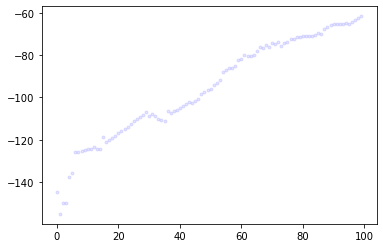

In [14]:
import matplotlib.pyplot as plt
plt.plot(avg_rewards, 'b.', alpha=.1)